In [1]:
#install packages/libraries
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
!pip install --upgrade numpy==1.26.0 pandas==2.2.2 packaging==24.2.0 pmdarima --user
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
#if error occurs, restart session and run again

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load file
df=pd.read_excel('/content/drive/MyDrive/Grad school stuff/WGU/D214 - Capstone/USDA Food Prices.xlsx')
df.head(20)

,Year,Month,EFPG_name,EFPG_code,Metroregion_name,Metroregion_code,Purchase_dollars_wtd,Purchase_grams_wtd,Purchase_dollars_unwtd,Purchase_grams_unwtd,Number_stores,Unit_value_mean_wtd,Unit_value_se_wtd,Unit_value_mean_unwtd,Price_index_GEKS
0,2012,1,Whole-grain breads,10000,National,0,249373447,48751953624,162985218,32175581169,41781,0.512,0.0008,0.507,0.950689
1,2012,2,Whole-grain breads,10000,National,0,221806717,43031809219,151271986,29580905685,41713,0.515,0.0006,0.511,0.957493
2,2012,3,Whole-grain breads,10000,National,0,228860452,44163705148,159316789,30972313780,41717,0.518,0.0006,0.514,0.959520
3,2012,4,Whole-grain breads,10000,National,0,222272932,43511461126,154210561,30313913114,41866,0.511,0.0006,0.509,0.946289
4,2012,5,Whole-grain breads,10000,National,0,229869147,44876926984,159388752,31370959539,41708,0.512,0.0006,0.508,0.944415
5,2012,6,Whole-grain breads,10000,National,0,220919503,43447695754,153123884,30294788117,41868,0.508,0.0006,0.505,0.941862
6,2012,7,Whole-grain breads,10000,National,0,229598184,45289563398,159409710,31710253492,42184,0.507,0.0006,0.503,0.939954
7,2012,8,Whole-grain breads,10000,National,0,229527044,46029247747,159515019,32252705786,42050,0.499,0.0006,0.495,0.926722
8,2012,9,Whole-grain breads,10000,National,0,215695497,42765269504,149855792,30004167487,41934,0.504,0.0007,0.499,0.936958
9,2012,10,Whole-grain breads,10000,National,0,216398939,42371883463,150682279,29777580071,42269,0.511,0.0008,0.506,0.950006


In [4]:
#unique regions in the dataset
df['Metroregion_name'].unique()

array(['National', 'Census Region 1: Northeast',
       'Census Region 2: Midwest', 'Census Region 3: South',
       'Census Region 4: West', 'Atlanta-Sandy Springs-Roswell  GA',
       'Boston-Cambridge-Newton  MA-NH',
       'Chicago-Naperville-Elgin  IL-IN-WI',
       'Dallas-Fort Worth-Arlington  TX', 'Detroit-Warren-Dearborn  MI',
       'Houston-The Woodlands-Sugar Land  TX',
       'Los Angeles-Long Beach-Anaheim  CA',
       'Miami-Fort Lauderdale-West Palm Beach  FL',
       'New York-Newark-Jersey City  NY-NJ-PA',
       'Philadelphia-Camden-Wilmington  PA-NJ-DE-MD'], dtype=object)

In [5]:
#only include datapoints from the southern region
df=df[df['Metroregion_name']=='Census Region 3: South']
df.head(10)

,Year,Month,EFPG_name,EFPG_code,Metroregion_name,Metroregion_code,Purchase_dollars_wtd,Purchase_grams_wtd,Purchase_dollars_unwtd,Purchase_grams_unwtd,Number_stores,Unit_value_mean_wtd,Unit_value_se_wtd,Unit_value_mean_unwtd,Price_index_GEKS
252,2012,1,Whole-grain breads,10000,Census Region 3: South,3,85554678,16822479581,63235971,12602196900,20171,0.509,0.0006,0.502,0.935265
253,2012,2,Whole-grain breads,10000,Census Region 3: South,3,77964223,15107786405,59404094,11611976207,20144,0.516,0.0005,0.512,0.940489
254,2012,3,Whole-grain breads,10000,Census Region 3: South,3,81634364,15764573148,62540167,12172348097,20128,0.518,0.0004,0.514,0.942521
255,2012,4,Whole-grain breads,10000,Census Region 3: South,3,78424704,15377857273,60014682,11797518130,20222,0.510,0.0005,0.509,0.933138
256,2012,5,Whole-grain breads,10000,Census Region 3: South,3,79242827,15560312570,60628966,12027552372,20123,0.509,0.0005,0.504,0.931244
257,2012,6,Whole-grain breads,10000,Census Region 3: South,3,76106780,15005167338,58318929,11533505752,20205,0.507,0.0004,0.506,0.930917
258,2012,7,Whole-grain breads,10000,Census Region 3: South,3,79391090,15855547598,61058113,12290718597,20320,0.501,0.0004,0.497,0.922387
259,2012,8,Whole-grain breads,10000,Census Region 3: South,3,79553284,16354256911,61626245,12692685460,20251,0.486,0.0004,0.486,0.900420
260,2012,9,Whole-grain breads,10000,Census Region 3: South,3,74291625,14968217409,57148101,11593518992,20191,0.496,0.0004,0.493,0.912006
261,2012,10,Whole-grain breads,10000,Census Region 3: South,3,75025000,14762125877,57291573,11360605652,20109,0.508,0.0007,0.504,0.929461


In [6]:
#unique products in the dataset
df['EFPG_name'].unique()

array(['Whole-grain breads', 'Whole-grain rice and pasta',
       'Whole-grain breakfast grains',
       'Whole-grain flour, bread mixes, and frozen dough',
       'Non-whole-grain breads', 'Non-whole-grain rice and pasta',
       'Non-whole-grain breakfast grains',
       'Non-whole-grain flour, bread mixes, and frozen dough',
       'Potatoes, fresh', 'Potatoes, canned',
       'Other starchy vegetables, fresh',
       'Other starchy vegetables, fresh cut',
       'Other starchy vegetables, frozen',
       'Other starchy vegetables, canned', 'Tomatoes, fresh',
       'Tomatoes, canned', 'Other red and orange vegetables, fresh',
       'Other red and orange vegetables, fresh cut',
       'Other red and orange vegetables, frozen',
       'Other red and orange vegetables, canned',
       'Dark green vegetables, fresh', 'Dark green vegetables, fresh cut',
       'Dark green vegetables, frozen', 'Dark green vegetables, canned',
       'Beans, lentils, and peas, fresh/dried',
       'Beans

In [7]:
#include only fresh potatoes
df=df[df['EFPG_name']=='Potatoes, fresh']
df.head(10)

,Year,Month,EFPG_name,EFPG_code,Metroregion_name,Metroregion_code,Purchase_dollars_wtd,Purchase_grams_wtd,Purchase_dollars_unwtd,Purchase_grams_unwtd,Number_stores,Unit_value_mean_wtd,Unit_value_se_wtd,Unit_value_mean_unwtd,Price_index_GEKS
10332,2012,1,"Potatoes, fresh",20000,Census Region 3: South,3,97762792,66979008522,69099564,46860746370,8729,0.146,0.0003,0.147,1.094578
10333,2012,2,"Potatoes, fresh",20000,Census Region 3: South,3,88865693,60737199856,64848245,43811814587,8694,0.146,0.0004,0.148,1.087619
10334,2012,3,"Potatoes, fresh",20000,Census Region 3: South,3,90173045,62010860892,67018799,45342631528,8644,0.145,0.0003,0.148,1.071631
10335,2012,4,"Potatoes, fresh",20000,Census Region 3: South,3,88823711,62051176907,65823998,45072591871,8640,0.143,0.0004,0.146,1.073801
10336,2012,5,"Potatoes, fresh",20000,Census Region 3: South,3,88715768,60497617620,65075438,43951062882,10555,0.147,0.0004,0.148,1.086427
10337,2012,6,"Potatoes, fresh",20000,Census Region 3: South,3,84135685,56778340502,62242773,41493708150,8661,0.148,0.0004,0.150,1.105747
10338,2012,7,"Potatoes, fresh",20000,Census Region 3: South,3,84253513,58546726118,62833991,43270228556,8641,0.144,0.0004,0.145,1.071877
10339,2012,8,"Potatoes, fresh",20000,Census Region 3: South,3,86016761,59928794756,63827102,43502892028,8446,0.144,0.0004,0.147,1.078814
10340,2012,9,"Potatoes, fresh",20000,Census Region 3: South,3,82666324,59175598637,61708975,43021789960,8653,0.140,0.0004,0.143,1.064984
10341,2012,10,"Potatoes, fresh",20000,Census Region 3: South,3,87617776,65396132873,64930565,47332523339,8673,0.134,0.0004,0.137,1.043637


In [8]:
#double check
print(df['EFPG_name'].unique())
print(df['Metroregion_name'].unique())

['Potatoes, fresh']
['Census Region 3: South']


In [9]:
#only include relevant columns for analysis
df=df[['Year', 'Month', 'Unit_value_mean_wtd']]
df.head(10)

,Year,Month,Unit_value_mean_wtd
10332,2012,1,0.146
10333,2012,2,0.146
10334,2012,3,0.145
10335,2012,4,0.143
10336,2012,5,0.147
10337,2012,6,0.148
10338,2012,7,0.144
10339,2012,8,0.144
10340,2012,9,0.140
10341,2012,10,0.134


In [10]:
df.shape

(84, 3)

In [11]:
#check for duplicates
print(df.duplicated().value_counts())

False    84
Name: count, dtype: int64


In [12]:
#check for missing values
df.isnull().sum().sort_values(ascending=False)

,0
Year,0
Month,0
Unit_value_mean_wtd,0


In [13]:
df.insert(0, 'month', range(1, 1 + len(df)))
df

,month,Year,Month,Unit_value_mean_wtd
10332,1,2012,1,0.146
10333,2,2012,2,0.146
10334,3,2012,3,0.145
10335,4,2012,4,0.143
10336,5,2012,5,0.147
...,...,...,...,...
10411,80,2018,8,0.190
10412,81,2018,9,0.187
10413,82,2018,10,0.181
10414,83,2018,11,0.168


In [14]:
#data is clean and corrected month columns so set as index
df = df.set_index('month')
df=df['Unit_value_mean_wtd']
df.head(10)

,Unit_value_mean_wtd
month,
1,0.146
2,0.146
3,0.145
4,0.143
5,0.147
6,0.148
7,0.144
8,0.144
9,0.140


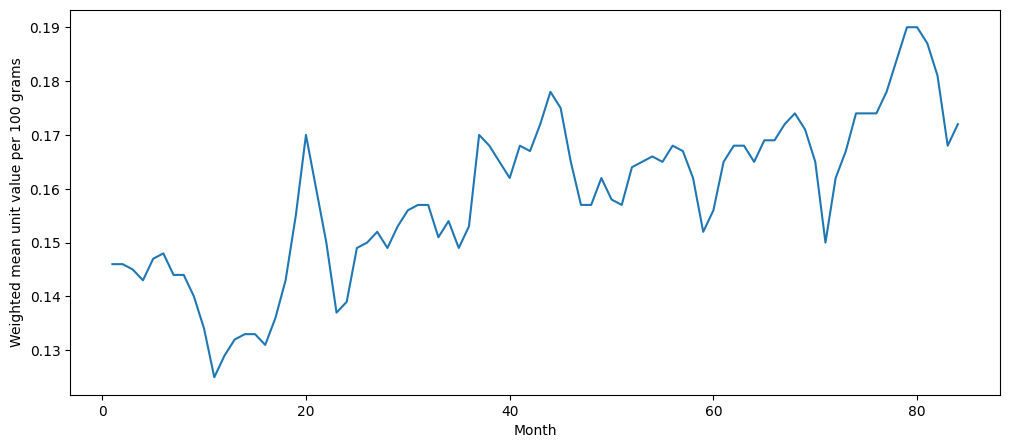

In [15]:
#plot data
df.plot(figsize=(12,5))
plt.ylabel('Weighted mean unit value per 100 grams')
plt.xlabel('Month')
plt.show()

In [16]:
#Check for stationarity through the Augmented Dickey-Fuller method (adf)
def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF: ", dftest[0])
  print("2. P-value: ", dftest[1])
  print("3. Num of Lags:", dftest[2])
  print("4. Num of Obsd Used for ADF Regression and Critical Values Calc:", dftest[3])
  print("5. Critical Values: ")
  for key, val in dftest[4].items():
    print("\t",key,": ", val)
ad_test(df)

1. ADF:  -1.2440970989709825
2. P-value:  0.6543446007639974
3. Num of Lags: 12
4. Num of Obsd Used for ADF Regression and Critical Values Calc: 71
5. Critical Values: 
	 1% :  -3.526004646825607
	 5% :  -2.9032002348069774
	 10% :  -2.5889948363419957


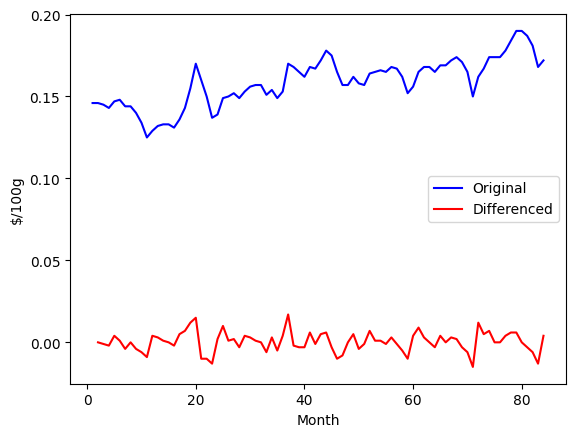

In [17]:
#see if differencing would make data more stationary
df_diff=df.diff().dropna()
plt.ylabel('$/100g')
plt.xlabel('Month')
orig=plt.plot(df, color='blue', label='Original')
diff_plot=plt.plot(df_diff, color='red', label='Differenced')
plt.legend(loc='best')
plt.show(block=False)

In [18]:
#Check for stationarity of df_diff
def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF: ", dftest[0])
  print("2. P-value: ", dftest[1])
  print("3. Num of Lags:", dftest[2])
  print("4. Num of Obsd Used for ADF Regression and Critical Values Calc:", dftest[3])
  print("5. Critical Values: ")
  for key, val in dftest[4].items():
    print("\t",key,": ", val)
ad_test(df_diff)

1. ADF:  -3.4931159890947217
2. P-value:  0.008165660172670869
3. Num of Lags: 12
4. Num of Obsd Used for ADF Regression and Critical Values Calc: 70
5. Critical Values: 
	 1% :  -3.5274258688046647
	 5% :  -2.903810816326531
	 10% :  -2.5893204081632653


In [19]:
df_diff.head(10)

,Unit_value_mean_wtd
month,
2,0.000
3,-0.001
4,-0.002
5,0.004
6,0.001
7,-0.004
8,0.000
9,-0.004
10,-0.006


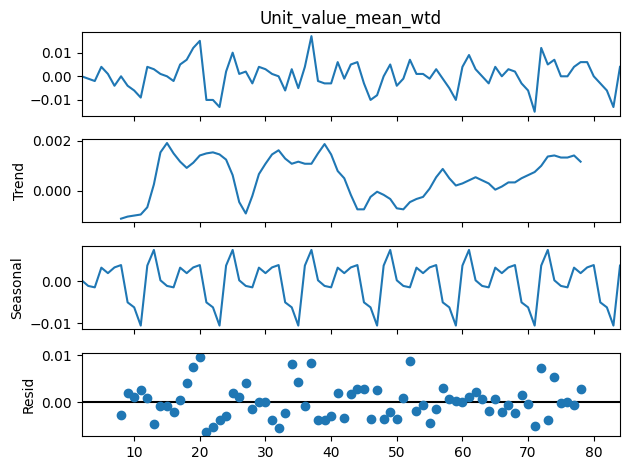

In [20]:
#Decomposition of df_diff
decomp = seasonal_decompose(df_diff, model='additive', period=12)
decomp.plot()
plt.show()

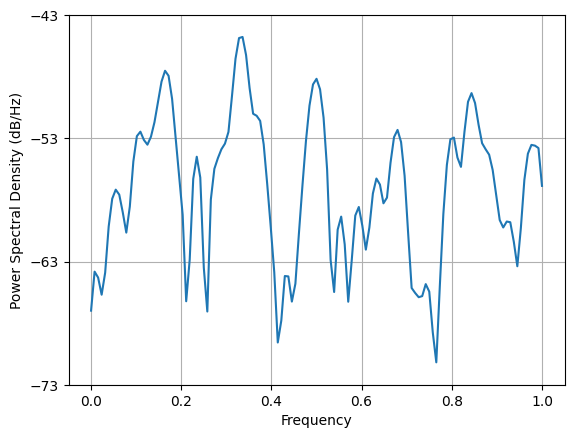

In [21]:
#plot spectral density to check for seasonality
plt.psd(df_diff)
plt.show()

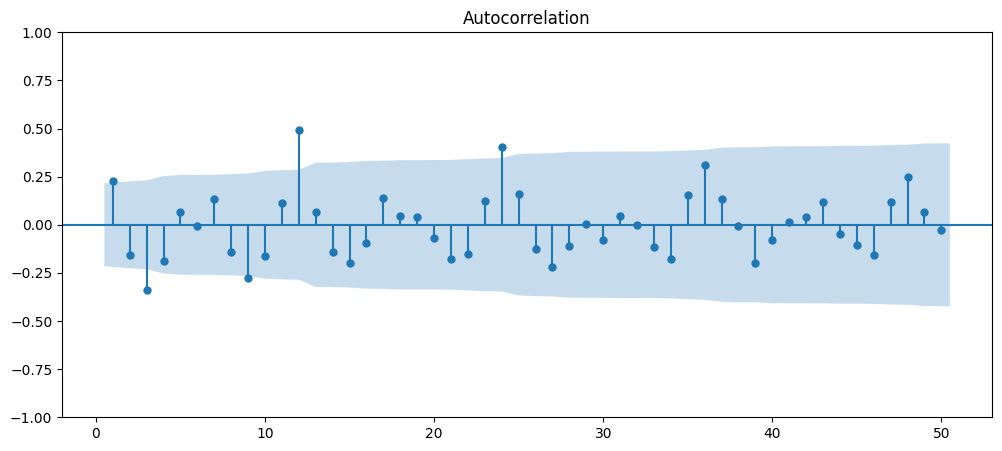

In [22]:
#plot ACF
from statsmodels.graphics.tsaplots import plot_acf
fig, ax1 = plt.subplots(figsize=(12,5))
plot_acf(df_diff, lags=50, zero=False, ax=ax1)
plt.show()

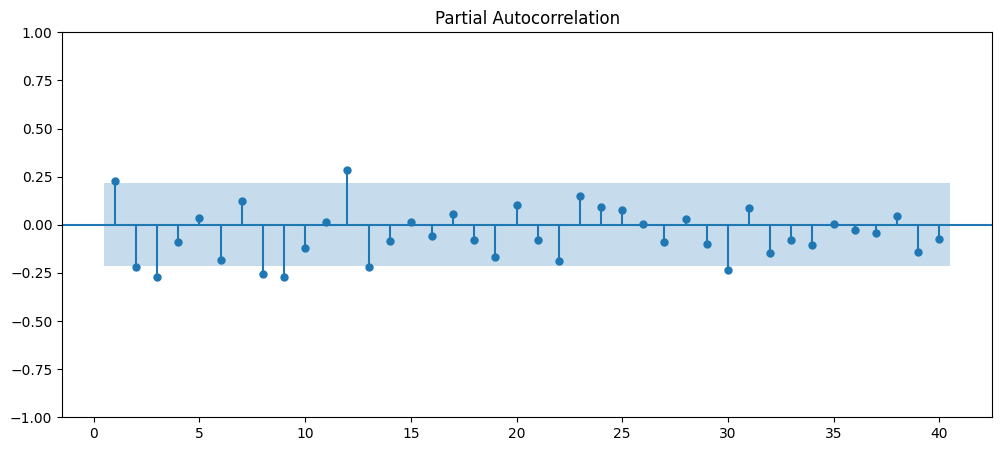

In [23]:
#plot pacf
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax1 = plt.subplots(figsize=(12,5))
plot_pacf(df_diff, lags=40, zero=False, ax=ax1)
plt.show()

In [24]:
#export differenced potato dataset
df_diff.to_csv('df_diff.csv')

In [25]:
#create a train and test dataset from original dataset
train=df.iloc[:-3]
train.index.name='month'
pd.Series.to_frame(train)
print(train.shape)
test=df.iloc[-3:]
test.index.name='month'
pd.Series.to_frame(test)
print(test.shape)

(81,)
(3,)


In [26]:
#export train and test dataset
train.to_csv('train.csv')
test.to_csv('test.csv')

In [27]:
auto_arima_model = auto_arima(df, start_p=1, start_q=1,
                              max_p=3, max_q=3, m=12,
                              start_P=0, seasonal=True,
                              d=1, D=1, trace=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True)
print(auto_arima_model.aic())
print(auto_arima_model.summary())

Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-554.886, Time=1.78 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-526.280, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-551.010, Time=0.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-555.565, Time=0.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-528.824, Time=0.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-546.219, Time=0.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-556.231, Time=5.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-552.200, Time=4.71 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,1,2)[12]             : AIC=-560.350, Time=8.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-552.226, Time=1.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,1,2)[12]             : AIC=-558.802, Time=6.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-556.286, Time=0.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,1,2)[12]             : AIC=-559.171, Time=3.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,1,2)[12]             : AIC=-556.147, Time=4.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,1,2)[12] intercept   : AIC=-558.757, Time=1.26 sec

Best model:  ARIMA(0,1,0)(0,1,2)[12]          
Total fit time: 40.381 seconds
-560.3499482152333
                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                   84
Model:             SARIMAX(0, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                 283.175
Date:                                 Mon, 23 Jun 2025   AIC                           -560.350
Time:                                         01:14:12   BIC                           -553.562
Sample:                                              0   HQIC                          -557.651
                                                  - 84                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025 

In [28]:
#SARIMA model based on the first autoarima recommended parameters
modelv1 = SARIMAX(train, order=(0, 1, 0), seasonal_order=(0, 1, 1, 12))
modelv1_fit = modelv1.fit()
print(modelv1_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                  Unit_value_mean_wtd   No. Observations:                   81
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 269.050
Date:                              Mon, 23 Jun 2025   AIC                           -534.099
Time:                                      01:14:12   BIC                           -529.660
Sample:                                           0   HQIC                          -532.340
                                               - 81                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.7753      0.339     -2.284      0.022      -1.441      -0.110
sigma2      1.834e-

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
#make prediction v1
start=len(train)
end=len(train)+len(test)-1
predv1=modelv1_fit.predict(start=start, end=end, typ='levels')
print(predv1)

81    0.181305
82    0.170832
83    0.175921
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [30]:
#set index
predv1.index = test.index
print(predv1)

month
82    0.181305
83    0.170832
84    0.175921
Name: predicted_mean, dtype: float64


In [31]:
#calculate confidence interval for v1
confidence_intervalv1=modelv1_fit.get_prediction(start=start, end=end, typ='levels')
confidence_intervalv1=confidence_intervalv1.conf_int()
confidence_intervalv1.index=test.index
print(confidence_intervalv1)

       lower Unit_value_mean_wtd  upper Unit_value_mean_wtd
month                                                      
82                      0.172829                   0.189782
83                      0.158844                   0.182819
84                      0.161239                   0.190603


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [32]:
#assign confidence interval
lower_limitsv1=confidence_intervalv1.loc[:,'lower Unit_value_mean_wtd']
upper_limitsv1=confidence_intervalv1.loc[:,'upper Unit_value_mean_wtd']
print(lower_limitsv1)
print(upper_limitsv1)

month
82    0.172829
83    0.158844
84    0.161239
Name: lower Unit_value_mean_wtd, dtype: float64
month
82    0.189782
83    0.182819
84    0.190603
Name: upper Unit_value_mean_wtd, dtype: float64


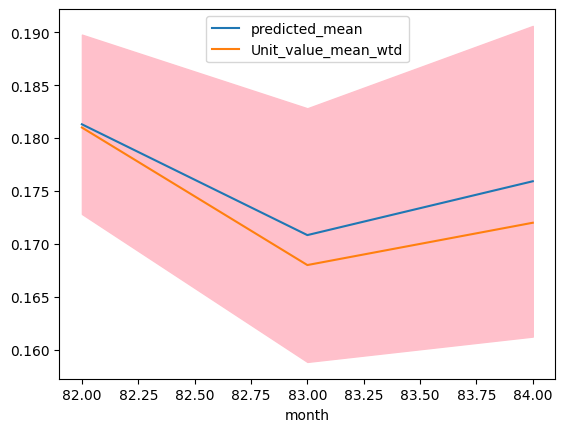

In [33]:
#plot test data and v1
predv1.plot(legend=True)
test.plot(legend=True)
plt.fill_between(lower_limitsv1.index, lower_limitsv1, upper_limitsv1, color='pink')
plt.show()

In [34]:
#check error for predv1
MSE=mean_squared_error(test, predv1)
print('MSE:', MSE)
rmse = sqrt(mean_squared_error(test, predv1))
print('RMSE:',rmse)
MAPE=mean_absolute_percentage_error(test, predv1)
MAPE=MAPE*100
print('MAPE:', MAPE)

MSE: 7.82813676319576e-06
RMSE: 0.002797880762862449
MAPE: 1.3779259253581695


In [35]:
#SARIMA model based on the second autoarima recommended parameters
modelv2 = SARIMAX(train, order=(0, 1, 0), seasonal_order=(0, 1, 2, 12))
modelv2_fit = modelv2.fit()
print(modelv2_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                     Unit_value_mean_wtd   No. Observations:                   81
Model:             SARIMAX(0, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                 270.139
Date:                                 Mon, 23 Jun 2025   AIC                           -534.277
Time:                                         01:14:13   BIC                           -527.619
Sample:                                              0   HQIC                          -531.639
                                                  - 81                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -1.0657      0.242     -4.397      0.000      -1.541      -0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
#make prediction v2
start=len(train)
end=len(train)+len(test)-1
predv2=modelv2_fit.predict(start=start, end=end, typ='levels')
print(predv2)

81    0.181615
82    0.173433
83    0.175331
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [37]:
#set index
predv2.index = test.index
print(predv2)

month
82    0.181615
83    0.173433
84    0.175331
Name: predicted_mean, dtype: float64


In [38]:
#calculate confidence interval for v2
confidence_intervalv2=modelv2_fit.get_prediction(start=start, end=end, typ='levels')
confidence_intervalv2=confidence_intervalv2.conf_int()
confidence_intervalv2.index=test.index
print(confidence_intervalv2)

       lower Unit_value_mean_wtd  upper Unit_value_mean_wtd
month                                                      
82                      0.173608                   0.189622
83                      0.162109                   0.184756
84                      0.161463                   0.189200


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [39]:
#assign confidence interval
lower_limitsv2=confidence_intervalv2.loc[:,'lower Unit_value_mean_wtd']
upper_limitsv2=confidence_intervalv2.loc[:,'upper Unit_value_mean_wtd']
print(lower_limitsv2)
print(upper_limitsv2)

month
82    0.173608
83    0.162109
84    0.161463
Name: lower Unit_value_mean_wtd, dtype: float64
month
82    0.189622
83    0.184756
84    0.189200
Name: upper Unit_value_mean_wtd, dtype: float64


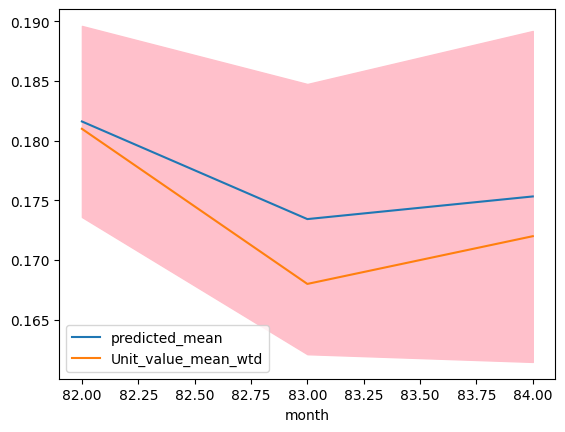

In [40]:
#plot test data and v2
predv2.plot(legend=True)
test.plot(legend=True)
plt.fill_between(lower_limitsv2.index, lower_limitsv2, upper_limitsv2, color='pink')
plt.show()

In [41]:
#check error for predv2
MSE=mean_squared_error(test, predv2)
print('MSE:', MSE)
rmse = sqrt(mean_squared_error(test, predv2))
print('RMSE:',rmse)
MAPE=mean_absolute_percentage_error(test, predv2)
MAPE=MAPE*100
print('MAPE:', MAPE)

MSE: 1.3664600202673596e-05
RMSE: 0.003696566001395565
MAPE: 1.836915302127491


In [42]:
#export prediction v1 from model
predv1=pd.DataFrame(predv1)
predv1.columns=['Unit_value_mean_wtd']
predv1.index.name='month'
confidence_intervalv1=pd.DataFrame(confidence_intervalv1)
confidence_intervalv1.columns=['lower Unit_value_mean_wtd', 'upper Unit_value_mean_wtd']
confidence_intervalv1.index.name='month'
predv1['lower Unit_value_mean_wtd']=confidence_intervalv1['lower Unit_value_mean_wtd']
predv1['upper Unit_value_mean_wtd']=confidence_intervalv1['upper Unit_value_mean_wtd']
predv1.to_csv('predv2.csv')

In [43]:
#summary of pred
predv1.describe()

,Unit_value_mean_wtd,lower Unit_value_mean_wtd,upper Unit_value_mean_wtd
count,3.000000,3.000000,3.000000
mean,0.176019,0.164304,0.187735
std,0.005238,0.007479,0.004277
min,0.170832,0.158844,0.182819
25%,0.173376,0.160041,0.186301
50%,0.175921,0.161239,0.189782
75%,0.178613,0.167034,0.190192
max,0.181305,0.172829,0.190603


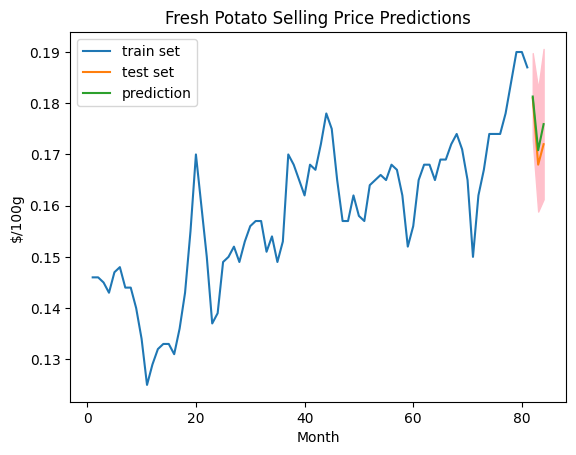

In [44]:
#graph prediction against test dataset
plt.plot(train, label = 'train set')
plt.plot(test, label = 'test set')
plt.plot(predv1['Unit_value_mean_wtd'], label = 'prediction')
plt.title('Fresh Potato Selling Price Predictions')
plt.xlabel('Month')
plt.ylabel('$/100g')
plt.legend(loc='upper left')
plt.fill_between(lower_limitsv1.index, lower_limitsv1, upper_limitsv1, color='pink')
plt.show()

In [45]:
#create forecast into the next quarter
modelv3 = SARIMAX(df, order=(0, 1, 0), seasonal_order=(0, 1, 1, 12))
modelv3_fit = modelv3.fit()
start=len(df)+1
end=len(df)+3
forecast=modelv3_fit.predict(start=start, end=end, typ='levels')
pd.Series.to_frame(forecast)
forecast.index.name='month'
print(forecast)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


month
85    0.182632
86    0.182381
87    0.182164
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [46]:
#calculate confidence interval
confidence_interval3=modelv3_fit.get_prediction(start=start, end=end, typ='levels')
confidence_interval3=confidence_interval3.conf_int()
print(confidence_interval3)

    lower Unit_value_mean_wtd  upper Unit_value_mean_wtd
85                   0.169588                   0.195677
86                   0.166405                   0.198357
87                   0.163717                   0.200612


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [47]:
#assign confidence interval
lower_limits3=confidence_interval3.loc[:,'lower Unit_value_mean_wtd']
upper_limits3=confidence_interval3.loc[:,'upper Unit_value_mean_wtd']
print(lower_limits3)
print(upper_limits3)

85    0.169588
86    0.166405
87    0.163717
Name: lower Unit_value_mean_wtd, dtype: float64
85    0.195677
86    0.198357
87    0.200612
Name: upper Unit_value_mean_wtd, dtype: float64


In [48]:
print(train.tail(1))
print(test.head(1))
print(test.tail(1))
print(forecast.head(1))

month
81    0.187
Name: Unit_value_mean_wtd, dtype: float64
month
82    0.181
Name: Unit_value_mean_wtd, dtype: float64
month
84    0.172
Name: Unit_value_mean_wtd, dtype: float64
month
85    0.182632
Name: predicted_mean, dtype: float64


In [49]:
#make connecting plots
connect1= {81: 0.187, 82: 0.181}
connect1= pd.Series(data=connect1, index=[81, 82])
connect2= {84: 0.172, 85: 0.182632}
connect2= pd.Series(data=connect2, index=[84, 85])

In [50]:
train.index

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81],
      dtype='int64', name='month')

In [51]:
connect1.index

Index([81, 82], dtype='int64')

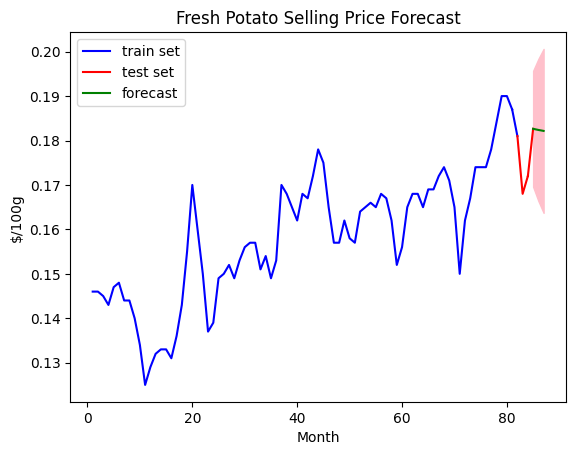

In [52]:
#graph train, test, and forecast together
plt.plot(train.index, train, label = 'train set', color='b')
plt.plot(connect1.index, connect1, color='b')
plt.plot(test.index, test, label = 'test set', color='r')
plt.plot(connect2.index, connect2, color='r')
plt.plot(forecast.index, forecast, label = 'forecast', color='g')
plt.title('Fresh Potato Selling Price Forecast')
plt.xlabel('Month')
plt.ylabel('$/100g')
plt.legend(loc='upper left')
plt.fill_between(forecast.index, lower_limits3, upper_limits3, color='pink')
plt.show()

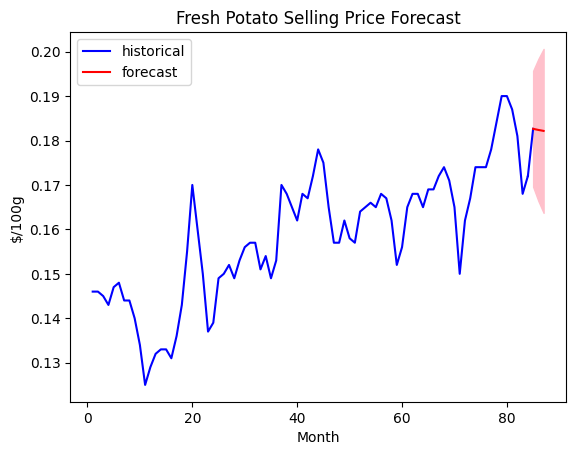

In [53]:
#graph historical and forecast together
plt.plot(df.index, df, label = 'historical', color='b')
plt.plot(connect2.index, connect2, color='b')
plt.plot(forecast.index, forecast, label = 'forecast', color='r')
plt.title('Fresh Potato Selling Price Forecast')
plt.xlabel('Month')
plt.ylabel('$/100g')
plt.legend(loc='upper left')
plt.fill_between(forecast.index, lower_limits3, upper_limits3, color='pink')
plt.show()

In [54]:
#summary
forecast=pd.DataFrame(forecast)
forecast.columns=['Unit_value_mean_wtd']
forecast.index.name='month'
confidence_interval3=pd.DataFrame(confidence_interval3)
confidence_interval3.columns=['lower Unit_value_mean_wtd', 'upper Unit_value_mean_wtd']
confidence_interval3.index.name='month'
forecast['lower Unit_value_mean_wtd']=confidence_interval3['lower Unit_value_mean_wtd']
forecast['upper Unit_value_mean_wtd']=confidence_interval3['upper Unit_value_mean_wtd']
forecast.describe()

,Unit_value_mean_wtd,lower Unit_value_mean_wtd,upper Unit_value_mean_wtd
count,3.000000,3.000000,3.000000
mean,0.182393,0.166570,0.198215
std,0.000234,0.002939,0.002471
min,0.182164,0.163717,0.195677
25%,0.182273,0.165061,0.197017
50%,0.182381,0.166405,0.198357
75%,0.182507,0.167996,0.199485
max,0.182632,0.169588,0.200612


In [55]:
#pricing deliverable
print("Average price:", forecast['Unit_value_mean_wtd'].mean())
print("Minimum price:", forecast['lower Unit_value_mean_wtd'].min())
print("Maximum price:", forecast['upper Unit_value_mean_wtd'].max())

Average price: 0.18239250341234103
Minimum price: 0.16371685067989472
Maximum price: 0.2006121477622006


In [56]:
#export forecast as csv
forecast.to_csv('forecast.csv')